In [34]:
psrname='J1857+0943'

In [35]:
#SPNA chain
EPTA_dir='/media/root1/3PAR/aman/posteriors/EPTA-ONLY/SPNA/'+psrname+'/TM_WN_DM10/ptmcmc/'

In [36]:
#SPNTA chain
EINPTA_dir='/media/root1/3PAR/aman/posteriors/EPTA-ONLY/SPNTA/'+psrname+'/results/'

In [37]:
%matplotlib inline
import sys, os
sys.path.insert(0,os.path.realpath(os.path.join(os.getcwd(),'../..')))
from getdist import plots, MCSamples
from getdist.gaussian_mixtures import GaussianND
import getdist
getdist.chains.print_load_details = False
import scipy
import matplotlib.pyplot as plt
import IPython
from IPython.display import Markdown
import numpy as np
import seaborn as sns
# import the tensiometer tools that we need:
import tensiometer
from tensiometer import utilities
from tensiometer import gaussian_tension
from tensiometer import mcmc_tension
import pandas as pd

In [38]:
#SPNA
epta_1=np.loadtxt(EPTA_dir+'chain_1.txt')
par_epta=pd.read_csv(EPTA_dir+'pars.txt', header = None)
len_epta=len(par_epta)
epta_2=epta_1.T

In [39]:
#SPNTA
einpta_1=np.loadtxt(EINPTA_dir+'TNfinal-'+psrname+'-post_equal_weights.dat')
par_einpta=pd.read_csv(EINPTA_dir+'TNfinal-'+psrname+'-.paramnames', header = None)
len_einpta=len(par_einpta)
einpta_2=einpta_1.T

In [40]:
epta_arr=[epta_2[len(par_epta)-1],epta_2[len(par_epta)-2]]
einpta_arr=[einpta_2[len(par_einpta)-2],einpta_2[len(par_einpta)-1]]

In [41]:
names = ['dm_logA','dm_gamma']
labels=['\log A_{DM}','\gamma_{DM}']
del_names=['delta_logA','delta_gamma']

In [42]:
epta=MCSamples(samples=np.array(epta_arr).transpose(),loglikes=epta_2[-3],names=names,labels=labels,label='SPNA')
einpta=MCSamples(samples=np.array(einpta_arr).transpose(),loglikes=einpta_2[-1],names = names,labels=labels,label='SPNTA \n'+psrname)

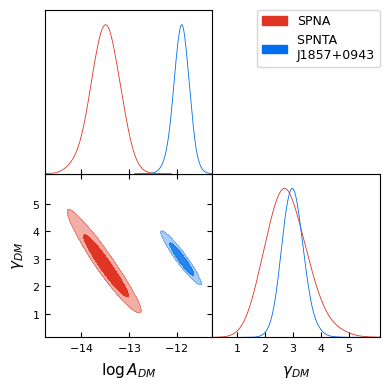

In [43]:
%matplotlib inline
g = plots.get_subplot_plotter()
g.triangle_plot([epta,einpta], filled=True)
plt.savefig(psrname+'_DM_SPNA+SPNTA_EPTA.png',dpi=300)
plt.show()

In [44]:
from diff_chain import  Diff_chain_shift


In [45]:
diff_chain, nsig, chi_2, D_B=Diff_chain_shift(epta,einpta)

/media/root1/3PAR/aman/posterior_comparisons/SPNA+SPNTA_runs_EPTA/diff_chain.py:29: UserWarning: Tension is higher than 4 sigma!! chi squared estimators will be used to compute the tension.
  warnings.warn('Tension is higher than 4 sigma!! chi squared estimators will be used to compute the tension.')


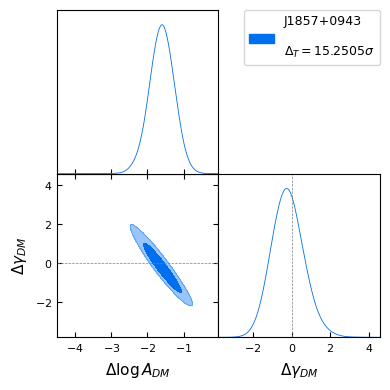

In [46]:
g = plots.get_subplot_plotter()
g.triangle_plot(diff_chain, filled=True,legend_labels = [psrname+'\n\n$\Delta_T=$'+
                        str("{:.4f}".format(nsig))+'$\sigma$'],markers=[0,0,0,0])
#g.add_label(['$\Delta=$'+str("{:.2f}".format(nsig))+'$\sigma$'], colored_text=True)
plt.savefig(psrname+'_diff_SPNA+SPNTA_EPTA.png',dpi=300)